# Display reconstructed tracks

In [1]:
import pandas as pd
import numpy as np
from scipy.interpolate import splprep, splev
import matplotlib.pyplot as plt
import itertools 

import sys
sys.path.append('/Users/glucia/Projects/DeepLearning/TrackingML')
from utils.terminal_colors import TerminalColors as tc
from core.geometry import DetectorGeometry

In [19]:
track_df = pd.read_csv('../../data/save/test_reco_tracks.csv')
print('Total number of tracks:', track_df['track_id'].nunique())
print('Total number of particles:', track_df['particle_id'].nunique())

Total number of tracks: 8764
Total number of particles: 6492


## Track length distribution

(array([  0.,   0.,   0., 952., 601., 411., 316., 232., 179., 141., 132.,
        108., 110.,  77.,  63.,  69.,  55.,  41.,  46.,  35.,  49.,  43.,
         33.,  24.,  21.,  32.,  23.,  25.,  22.,  18.,  17.,  22.,  15.,
         14.,  13.,  11.,  12.,   6.,  16.,   5.,   9.,   3.,  15.,   8.,
         12.,   5.,   3.,  13.,  11.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49.]),
 <BarContainer object of 49 artists>)

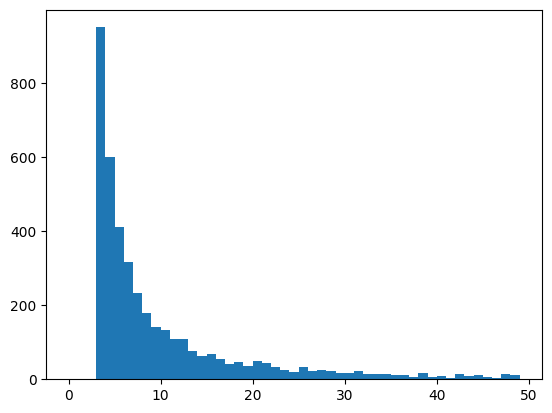

In [3]:
n_hits = track_df.groupby('track_id')['hit_id'].count()

plt.hist(n_hits, bins=range(0, 50, 1))

## Track display


Number of tracks: 8763


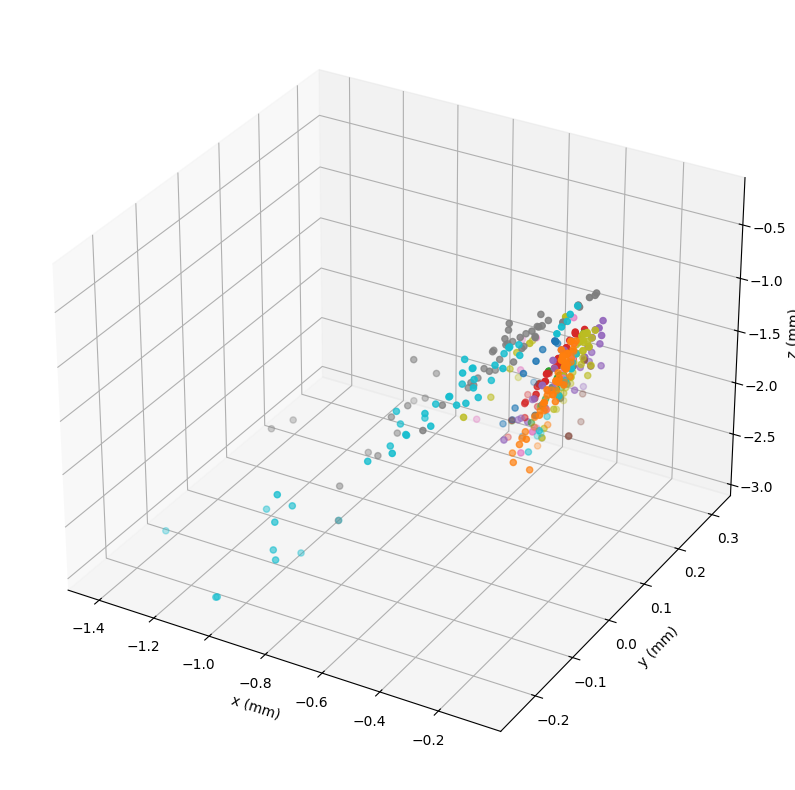

In [20]:
# reconstructed tracks

track_df.query('track_id != 0', inplace=True)

track_hits_dict = {}
for track_id in track_df['track_id'].unique():
    track_hits_dict[track_id] = [hit for hit in track_df.query(f'track_id == {track_id}')['hit_id']]
    
track_hits = {}
for track_id, hit_ids in track_hits_dict.items():
    track_hits[track_id] = track_df.query(f'hit_id in {hit_ids}')
print(tc.BOLD+'\nNumber of tracks:'+tc.RESET, len(track_hits))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

N_TRACKS = 20

tracks = {}
for track_id, track in dict(itertools.islice(track_hits.items(), N_TRACKS)).items():
    ax.scatter(track['x'], track['y'], track['z'], marker='o', label='track_id: '+str(track_id))

ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
ax.set_zlabel('z (mm)')
plt.show()


Number of tracks: 6469


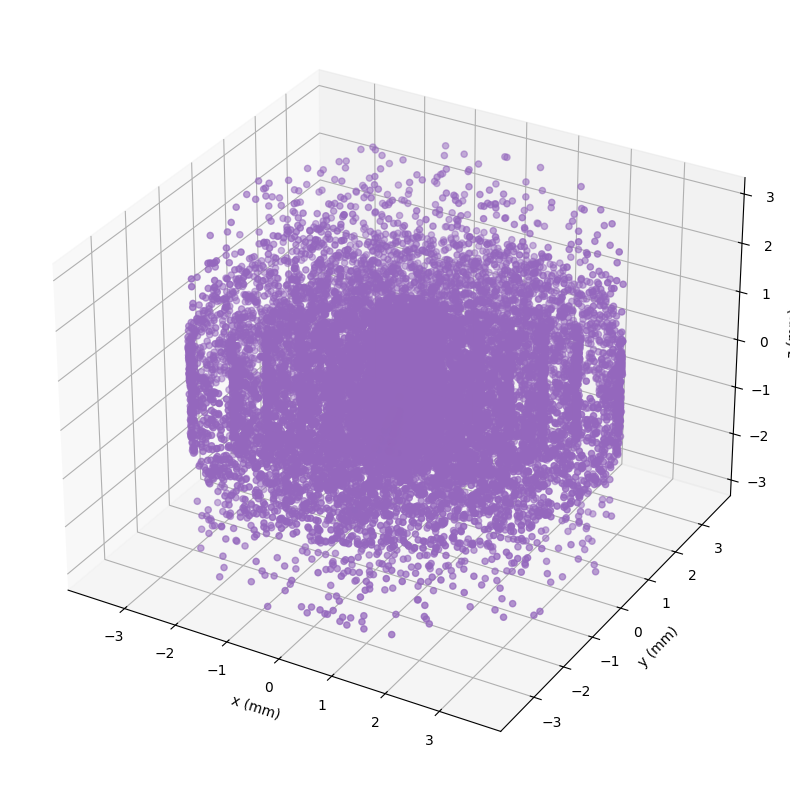

In [5]:
#track_df.query('particle_id != 0', inplace=True)

particle_hits_dict = {}
for particle_id in track_df['particle_id'].unique():
    particle_hits_dict[particle_id] = [hit for hit in track_df.query(f'particle_id == {particle_id}')['hit_id']]
    
track_hits = {}
for particle_id, hit_ids in particle_hits_dict.items():
    track_hits[particle_id] = track_df.query(f'hit_id in {hit_ids}')
print(tc.BOLD+'\nNumber of tracks:'+tc.RESET, len(track_hits))

# draw the first N tracks
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

N_TRACKS = 20 

tracks = {}
for particle_id, track in dict(itertools.islice(track_hits.items(), N_TRACKS)).items():
    ax.scatter(track['x'], track['y'], track['z'], marker='o', label='particle_id: '+str(particle_id))

ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
ax.set_zlabel('z (mm)')
plt.show()

Visualize track 1

In [5]:
def show_track(track_id, track_df):

    track = track_df.query(f'track_id == {track_id}')
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    for particle_id in track['particle_id'].unique():
        track_particle = track.query(f'particle_id == {particle_id}')
        ax.scatter(track_particle['x'], track_particle['y'], track_particle['z'], label='particle_id: '+str(particle_id))
    
    ax.set_xlabel('x (mm)')
    ax.set_ylabel('y (mm)')
    ax.set_zlabel('z (mm)')
    plt.legend()
    plt.show()

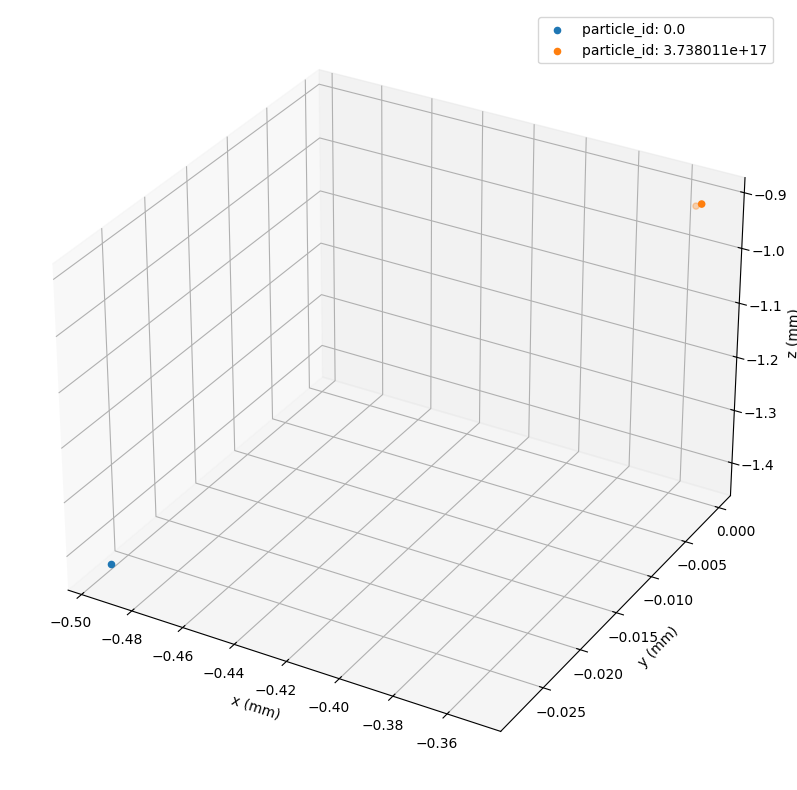

In [6]:
track_ids = track_df['track_id'].unique()

show_track(track_ids[5], track_df)

In [21]:
# select only tracks with unique particle_id that is not just 0

interesting_tracks = []
for track_id in track_df['track_id'].unique():
    track = track_df.query(f'track_id == {track_id}')
    if len(track['particle_id'].unique()) == 1 and track['particle_id'].unique()[0] == 0:
        pass
    else:
        interesting_tracks.append(track_id)

len(interesting_tracks)

8646


Interesting track
particle_id
1.125935e+17    4
9.908064e+16    2
5.854688e+17    1
3.242623e+17    1
1.936554e+17    1
Name: count, dtype: int64


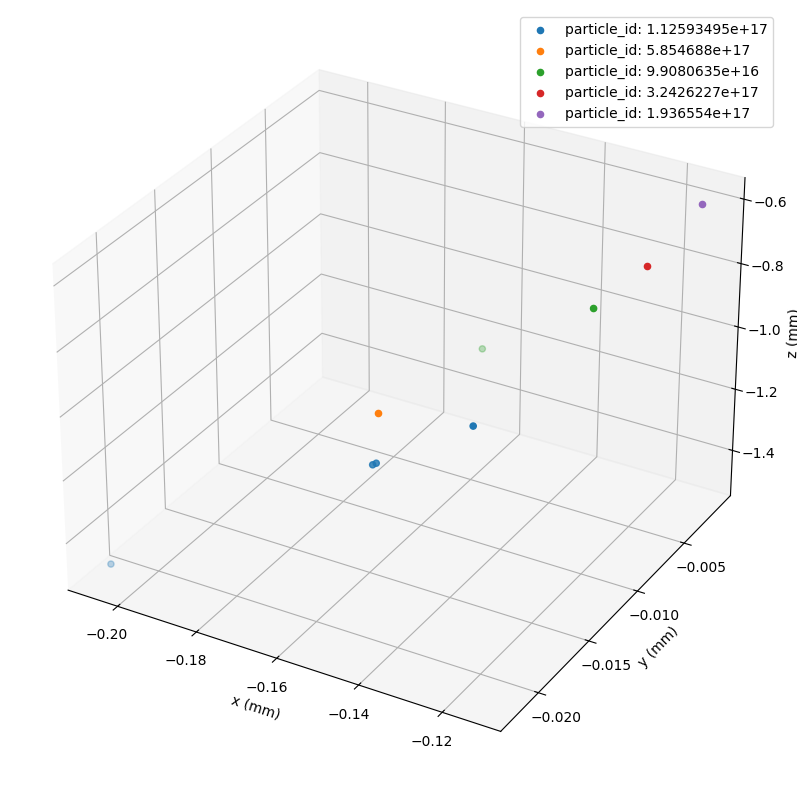

In [22]:
TRACK_IDX = 7

print(tc.BOLD+'\nInteresting track'+tc.RESET)
print(track_df.query(f'track_id == {interesting_tracks[TRACK_IDX]}')['particle_id'].value_counts())

show_track(interesting_tracks[TRACK_IDX], track_df) 

